In [33]:
# importar herramientas básicas

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [34]:
# inicialmente no era posible leer el archivo, fue necesario indicar el tipo de encoding.

df = pd.read_csv('200511COVID19MEXICO.csv', delimiter = ',', encoding='ISO-8859-1')

In [35]:
# guardar en el mejor formato para evitar que el problema ocurra de nuevo

df.to_csv('200511COVID19MEXICO.csv', encoding = 'utf-8')

In [36]:
# volvemos a leer

df = pd.read_csv('200511COVID19MEXICO.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,1,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,97
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,1,2,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,97
3,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,2
4,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,2


In [37]:
# Las columnas de fecha que necesitamos deben tener el formato correcto:

df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'])

In [38]:
# Primero es util explorar la sub-tabla que necesitamos

df1 = df[['ENTIDAD_RES','FECHA_SINTOMAS','FECHA_DEF']]

In [39]:
df1

,ENTIDAD_RES,FECHA_SINTOMAS,FECHA_DEF
0,27,2020-03-29,NaT
1,25,2020-03-22,2020-03-29
2,27,2020-03-18,2020-04-05
3,25,2020-04-04,2020-04-20
4,25,2020-04-02,2020-04-23
...,...,...,...
135111,9,2020-05-09,NaT
135112,4,2020-05-08,NaT
135113,5,2020-05-09,NaT
135114,31,2020-05-06,NaT


In [40]:
#confirmar que los tipos son correctos

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135116 entries, 0 to 135115
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ENTIDAD_RES     135116 non-null  int64         
 1   FECHA_SINTOMAS  135116 non-null  datetime64[ns]
 2   FECHA_DEF       5344 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 3.1 MB


In [41]:
# Sonora es la entidad federativa num 26, solo esos datos requerimos, por lo tanto:

df1 = df1.query('ENTIDAD_RES == 26')

In [42]:
df1.head()

,ENTIDAD_RES,FECHA_SINTOMAS,FECHA_DEF
225,26,2020-04-07,NaT
335,26,2020-04-06,NaT
571,26,2020-04-08,NaT
593,26,2020-04-14,NaT
774,26,2020-03-13,NaT


In [43]:
# Ahora agrupamos por fecha de inicio de sintomas y contamos las personas por fecha.

tabla1 = df1.groupby('FECHA_SINTOMAS').count()
tabla1

,ENTIDAD_RES,FECHA_DEF
FECHA_SINTOMAS,,
2020-01-02,2,0
2020-01-06,3,0
2020-01-10,3,0
2020-01-11,4,0
2020-01-12,1,0
...,...,...
2020-05-06,76,0
2020-05-07,53,0
2020-05-08,28,1


In [44]:
# Guardamos la tabla a csv

tabla1.to_csv('tabla1.csv', encoding = 'utf-8')

In [45]:
df2 = df[['ENTIDAD_RES','TIPO_PACIENTE']]

In [46]:
df2

,ENTIDAD_RES,TIPO_PACIENTE
0,27,1
1,25,2
2,27,1
3,25,2
4,25,2
...,...,...
135111,9,2
135112,4,2
135113,5,1
135114,31,1


In [47]:
# Ahora nos interesa informacion sobre los que fueron hospitalizados, es decir tipo de paciente 2

df2 = df2.query('TIPO_PACIENTE == 2')

In [48]:
df2

,ENTIDAD_RES,TIPO_PACIENTE
1,25,2
3,25,2
4,25,2
5,25,2
9,27,2
...,...,...
135096,9,2
135102,15,2
135105,15,2
135111,9,2


In [49]:
# Y además que sean solo de los estados de Sonora (26), Chihuahua (8), Nuevo León (19) y Puebla (21)

Sonora = df2.query('ENTIDAD_RES == 26')
Chihuahua = df2.query('ENTIDAD_RES == 8')
NuevoLeon = df2.query('ENTIDAD_RES == 19')
Puebla = df2.query('ENTIDAD_RES == 21')

In [50]:
# Ahora hacemos una sola tabla de estas selecciones

tabla2 = Sonora.append([Chihuahua, NuevoLeon, Puebla])

In [51]:
tabla2

,ENTIDAD_RES,TIPO_PACIENTE
225,26,2
593,26,2
774,26,2
1105,26,2
1137,26,2
...,...,...
134856,21,2
134926,21,2
134990,21,2
135083,21,2


In [52]:
# Ahora agrupamos por estado para conocer la cuenta de pacientes hospitalizados 

tabla2 = tabla2.groupby('ENTIDAD_RES').count()
tabla2

,TIPO_PACIENTE
ENTIDAD_RES,
8,1013
19,1065
21,1295
26,604


In [53]:
# Y guardamos

tabla2.to_csv('tabla2.csv', encoding = 'utf-8')

In [54]:
# Ahora queremos una gráfica de barras de casos hospitalizados por cada uno de los estados que vimos en la ultima tabla

df = pd.read_csv('tabla2.csv')
df

,ENTIDAD_RES,TIPO_PACIENTE
0,8,1013
1,19,1065
2,21,1295
3,26,604


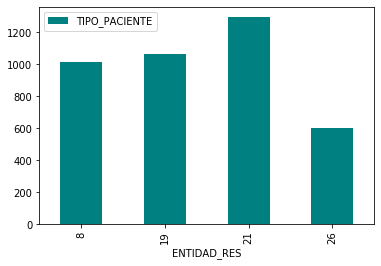

In [55]:
# Ya tenemos los datos necesarios y creamos la grafica 

grafica1 = df.plot.bar(x = 'ENTIDAD_RES', y = 'TIPO_PACIENTE', color = 'teal')

In [56]:
# Guardamos la grafica a png

fig = grafica1.get_figure()
fig.savefig('grafica1.png')

In [57]:
# Finalmente queremos graficar la serie de tiempo de confirmados a nivel nacional en el tiempo.
# Accesamos de nuevo la base de datos completa

df = pd.read_csv('200511COVID19MEXICO.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,1,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,97
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,1,2,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,97
3,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,2
4,4,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,1,99,MÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,99,2


In [58]:
df3 = df[['FECHA_SINTOMAS','ENTIDAD_RES']]

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135116 entries, 0 to 135115
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   FECHA_SINTOMAS  135116 non-null  object
 1   ENTIDAD_RES     135116 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [60]:
# Buscamos de nuevo el formato de fecha

df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])

In [61]:
df3 = df[['FECHA_SINTOMAS','ENTIDAD_RES']]

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135116 entries, 0 to 135115
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_SINTOMAS  135116 non-null  datetime64[ns]
 1   ENTIDAD_RES     135116 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 MB


In [63]:
df3.index

RangeIndex(start=0, stop=135116, step=1)

In [64]:
df3 = df3.groupby('FECHA_SINTOMAS').count()
df3

,ENTIDAD_RES
FECHA_SINTOMAS,
2020-01-01,22
2020-01-02,20
2020-01-03,16
2020-01-04,19
2020-01-05,26
...,...
2020-05-07,2560
2020-05-08,2060
2020-05-09,953


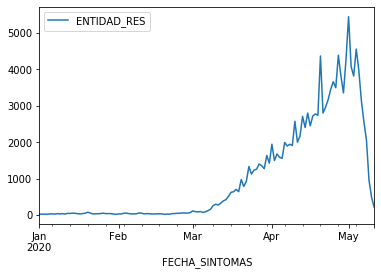

In [72]:
# Queremos un grafico que muestre la tendencia de los contagios en el timepo

df3.plot();

In [80]:
# Parece conveniente renombrar la columna de ENTIDAD_RES

df3 = df3.rename(columns={'ENTIDAD_RES':'Contagios', 'FECHA_SINTOMAS':'Fecha'})

In [81]:
df3

,Contagios
FECHA_SINTOMAS,
2020-01-01,22
2020-01-02,20
2020-01-03,16
2020-01-04,19
2020-01-05,26
...,...
2020-05-07,2560
2020-05-08,2060
2020-05-09,953


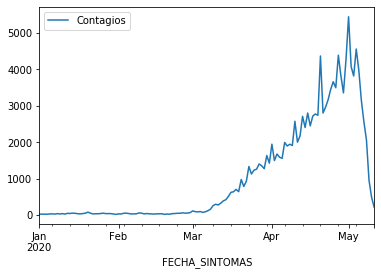

In [82]:
# Y podemos visualizar mejor el cambio en el tiempo

df3.plot();